# Loading Data

In [3]:
import numpy as np
import pandas as pd
import os
import pickle
import joblib
import sys
import glob
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.signal import correlate
import seaborn as sns
import pyod
from pyod.models.ocsvm import OCSVM
from pyod.models.lof import LOF
from pyod.models.pca import PCA
from pyod.models.iforest import IForest
from pyod.models.lmdd import LMDD
from scipy.stats import skew, kurtosis
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [4]:
normal_path = '/net/adv_spectrum/data/rss/downsample_10/normal/871'
fbs_1_path = '/net/adv_spectrum/data/rss/downsample_10/abnormal/871_ab_LOS-5M-USRP1'
fbs_2_path = '/net/adv_spectrum/data/rss/downsample_10/abnormal/871_ab_LOS-5M-USRP2'
fbs_3_path = '/net/adv_spectrum/data/rss/downsample_10/abnormal/871_ab_LOS-5M-USRP3'
fbs_4_path = '/net/adv_spectrum/data/rss/downsample_10/abnormal/871_ab_NLOS-5M-USRP1'
fbs_5_path = '/net/adv_spectrum/data/rss/downsample_10/abnormal/871_ab_Dynamics-5M-USRP1'
cso_path = '/net/adv_spectrum/data/rss/downsample_10/abnormal/871_ab_sigOver_5ms'
jamming_path = '/net/adv_spectrum/data/rss/downsample_10/abnormal/871_ab_jamming'
# jamming_path = '/net/adv_spectrum/data/rss/downsample_10/abnormal/0208_anomaly'

In [5]:
def rss_power(path):
    rss = []
    for file in glob.glob(path + '/*.txt'):
        with open(file, 'r') as f:
            for line in f:
                x = line.split()
                rss.append(float(x[0]))
    return np.array(rss)

In [6]:
def rss_autocorr(path, step=1000):
    all_corrs = []
    for file in glob.glob(path + '/*.txt'):
        rss = []
        with open(file, 'r') as f:
            for line in f:
                x = line.split()
                rss.append(float(x[0]))
        if len(rss) < 156000:
            continue
        else:
            rss = np.array(rss).reshape(-1)[:156000]
        corrs = []
        for i in range(step, len(rss), step):
            corr = pearsonr(rss[i - step:i], rss[i:i + step])[0]
            corrs.append(corr)
        all_corrs.extend(corrs)
    return np.array(all_corrs)


def rss_mean(path, step=1000):
    all_means = []
    for file in glob.glob(path + '/*.txt'):
        rss = []
        with open(file, 'r') as f:
            for line in f:
                x = line.split()
                rss.append(float(x[0]))
        rss = np.array(rss).reshape(-1)[:156000]
        if len(rss) < 156000:
            continue
        else:
            rss = np.array(rss).reshape(-1)[:156000]
        means = []
        for i in range(step, len(rss), step):
            mean = np.mean(rss[i - 1000:i])
            means.append(mean)
        all_means.extend(means)
    return np.array(all_means)


def rss_max(path, step=1000):
    all_maxs = []
    for file in glob.glob(path + '/*.txt'):
        rss = []
        with open(file, 'r') as f:
            for line in f:
                x = line.split()
                rss.append(float(x[0]))
        rss = np.array(rss).reshape(-1)[:156000]
        if len(rss) < 156000:
            continue
        else:
            rss = np.array(rss).reshape(-1)[:156000]
        maxs = []
        for i in range(step, len(rss), step):
            max_ = np.max(rss[i - 1000:i])
            maxs.append(max_)
        all_maxs.extend(maxs)
    return np.array(all_maxs)


def rss_min(path, step=1000):
    all_mins = []
    for file in glob.glob(path + '/*.txt'):
        rss = []
        with open(file, 'r') as f:
            for line in f:
                x = line.split()
                rss.append(float(x[0]))
        rss = np.array(rss).reshape(-1)[:156000]
        if len(rss) < 156000:
            continue
        else:
            rss = np.array(rss).reshape(-1)[:156000]
        mins = []
        for i in range(step, len(rss), step):
            _min = np.min(rss[i - 1000:i])
            mins.append(_min)
        all_mins.extend(mins)
    return np.array(all_mins)


def rss_std(path, step=1000):
    all_stds = []
    for file in glob.glob(path + '/*.txt'):
        rss = []
        with open(file, 'r') as f:
            for line in f:
                x = line.split()
                rss.append(float(x[0]))
        rss = np.array(rss).reshape(-1)[:156000]
        if len(rss) < 156000:
            continue
        else:
            rss = np.array(rss).reshape(-1)[:156000]
        stds = []
        for i in range(step, len(rss), step):
            std = np.std(rss[i - 1000:i])
            stds.append(std)
        all_stds.extend(stds)
    return np.array(all_stds)


def rss_skew(path, step=1000):
    all_skews = []
    for file in glob.glob(path + '/*.txt'):
        rss = []
        with open(file, 'r') as f:
            for line in f:
                x = line.split()
                rss.append(float(x[0]))
        rss = np.array(rss).reshape(-1)[:156000]
        if len(rss) < 156000:
            continue
        else:
            rss = np.array(rss).reshape(-1)[:156000]
        skews = []
        for i in range(step, len(rss), step):
            _skew = skew(rss[i - 1000:i])
            skews.append(_skew)
        all_skews.extend(skews)
    return np.array(all_skews)


def rss_kurtosis(path, step=1000):
    all_kurts = []
    for file in glob.glob(path + '/*.txt'):
        rss = []
        with open(file, 'r') as f:
            for line in f:
                x = line.split()
                rss.append(float(x[0]))
        rss = np.array(rss).reshape(-1)[:156000]
        if len(rss) < 156000:
            continue
        else:
            rss = np.array(rss).reshape(-1)[:156000]
        kurts = []
        for i in range(step, len(rss), step):
            kurt = kurtosis(rss[i - 1000:i])
            kurts.append(kurt)
        all_kurts.extend(kurts)
    return np.array(all_kurts)


def get_recall(clf, X, name):
    y_pred = clf.predict(X)
    recall = sum(y_pred) / len(y_pred)
    print('{} detection rate: {}'.format(name, recall))
    
    
def get_X(path):
    corr_ = rss_autocorr(path)[:, np.newaxis]
    mean_ = rss_mean(path)[:, np.newaxis]
    max_ = rss_max(path)[:, np.newaxis]
    min_ = rss_min(path)[:, np.newaxis]
    std_ = rss_std(path)[:, np.newaxis]
    skew_ = rss_skew(path)[:, np.newaxis]
    kurt_ = rss_kurtosis(path)[:, np.newaxis]
    return np.hstack((corr_, mean_, max_, min_, std_, skew_, kurt_))

In [7]:
X_fbs_1 = get_X(fbs_1_path)
X_fbs_2 = get_X(fbs_2_path)
X_fbs_3 = get_X(fbs_3_path)
X_fbs_4 = get_X(fbs_4_path)
X_fbs_5 = get_X(fbs_5_path)

In [8]:
X_normal = get_X(normal_path)
X_fbs_1 = get_X(fbs_1_path)
X_cso = get_X(cso_path)

NameError: name 'fbs_path' is not defined

# Rule Based Results

## Power Quantile

In [146]:
fbs_1_corr = rss_autocorr(fbs_1_path)
fbs_2_corr = rss_autocorr(fbs_2_path)
fbs_3_corr = rss_autocorr(fbs_3_path)

In [189]:
normal_mean = rss_power(normal_path)[:normal_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
fbs_1_mean = rss_power(fbs_1_path)[:fbs_1_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
fbs_2_mean = rss_power(fbs_2_path)[:fbs_2_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
fbs_3_mean = rss_power(fbs_3_path)[:fbs_3_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
fbs_4_mean = rss_power(fbs_4_path)[:fbs_4_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
fbs_5_mean = rss_power(fbs_5_path)[:fbs_5_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
cso_mean = rss_power(cso_path)[:cso_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)

In [187]:
th = np.quantile(normal_mean, 0.95)

In [188]:
for i in [fbs_1_mean, fbs_2_mean, fbs_3_mean, fbs_4_mean, fbs_5_mean, cso_mean]:
    result = np.where(i > th, 1, 0)
    print(sum(result) / len(result))

0.8143010752688172
0.32827956989247314
0.8143010752688172
0.09258064516129032
0.5617204301075269
0.027852084972462627


## Autocorrelation

In [171]:
th_corr = np.quantile(normal_corr, 0.05)

In [175]:
for i in [fbs_1_corr, fbs_2_corr, fbs_3_corr, fbs_4_corr, fbs_5_corr, cso_corr]:
    result = np.where(i < th_corr, 1, 0)
    print(sum(result) / len(result))

0.02043010752688172
0.026774193548387098
0.011720430107526882
0.06720430107526881
0.052473118279569894
0.06640440597954367


# ML-Based Results

In [142]:
clf_name = 'OCSVM'
clf = OCSVM(contamination=0.05)
clf.fit(X_normal)

get_recall(clf, X_fbs_1, 'X_fbs_1')
get_recall(clf, X_fbs_2, 'X_fbs_2')
get_recall(clf, X_fbs_3, 'X_fbs_3')
get_recall(clf, X_fbs_4, 'X_fbs_4')
get_recall(clf, X_fbs_5, 'X_fbs_5')
get_recall(clf, X_cso, 'X_cso')

X_fbs_1 detection rate: 0.6320430107526882
X_fbs_2 detection rate: 0.26741935483870966
X_fbs_3 detection rate: 0.2489247311827957
X_fbs_4 detection rate: 0.2896774193548387
X_fbs_5 detection rate: 0.5189247311827957
X_cso detection rate: 0.12541306058221874


In [143]:
clf_name = 'PCA'
clf = PCA(contamination=0.05)
clf.fit(X_normal)

get_recall(clf, X_fbs_1, 'X_fbs_1')
get_recall(clf, X_fbs_2, 'X_fbs_2')
get_recall(clf, X_fbs_3, 'X_fbs_3')
get_recall(clf, X_fbs_4, 'X_fbs_4')
get_recall(clf, X_fbs_5, 'X_fbs_5')
get_recall(clf, X_cso, 'X_cso')

X_fbs_1 detection rate: 0.02913978494623656
X_fbs_2 detection rate: 0.0556989247311828
X_fbs_3 detection rate: 0.04010752688172043
X_fbs_4 detection rate: 0.09881720430107527
X_fbs_5 detection rate: 0.09086021505376345
X_cso detection rate: 0.08450039339103069


In [140]:
clf_name = 'LMDD'
clf = LMDD(contamination=0.05)
clf.fit(X_normal)

get_recall(clf, X_fbs_1, 'X_fbs_1')
get_recall(clf, X_fbs_2, 'X_fbs_2')
get_recall(clf, X_fbs_3, 'X_fbs_3')
get_recall(clf, X_fbs_4, 'X_fbs_4')
get_recall(clf, X_fbs_5, 'X_fbs_5')
get_recall(clf, X_cso, 'X_cso')

X_fbs_1 detection rate: 0.2696774193548387
X_fbs_2 detection rate: 0.06053763440860215
X_fbs_3 detection rate: 0.012795698924731183
X_fbs_4 detection rate: 0.2678494623655914
X_cso detection rate: 0.13170731707317074


In [141]:
get_recall(clf, X_fbs_5, 'X_fbs_5')

X_fbs_5 detection rate: 0.1981720430107527


# Visualization

## Autocorrelation

In [181]:
normal_corr = rss_autocorr(normal_path)
fbs_3_corr = rss_autocorr(fbs_1_path)
fbs_4_corr = rss_autocorr(fbs_4_path)
fbs_5_corr = rss_autocorr(fbs_5_path)
cso_corr = rss_autocorr(cso_path)

In [12]:
colors = sns.color_palette("Set2")

Text(0, 0.5, 'Cumulative Probability Density')

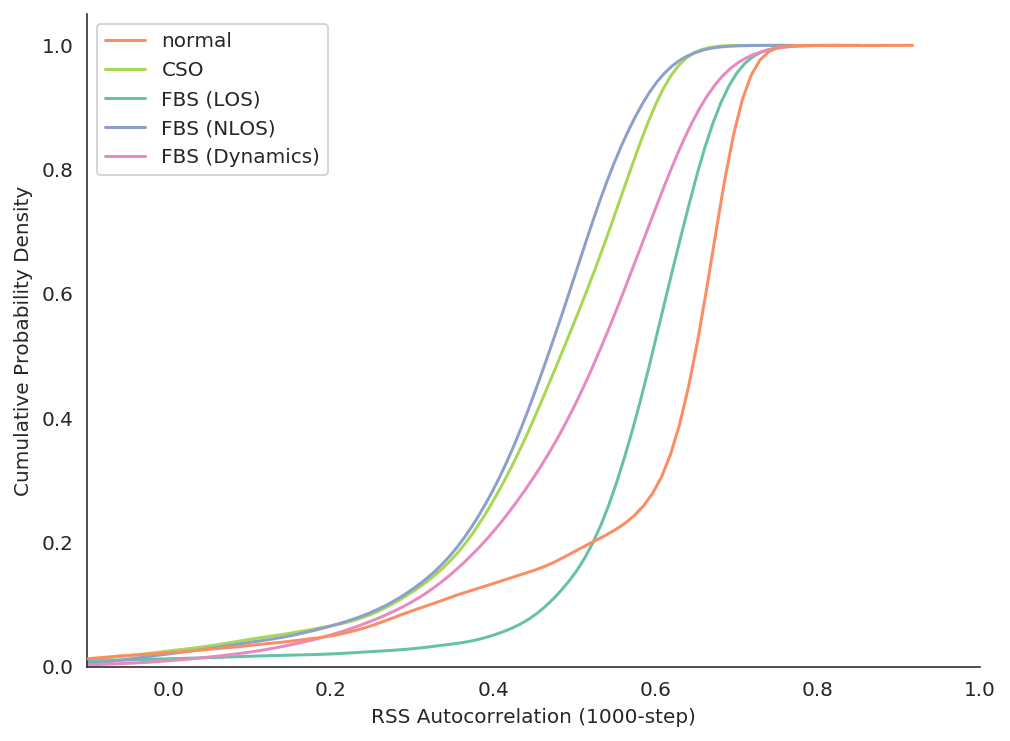

In [118]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(normal_corr, cumulative=True, shade=False, zorder=100,
                 color=colors[1], label='normal')
ax = sns.kdeplot(cso_corr, cumulative=True, shade=False, 
                 color=colors[4], label='CSO')
ax = sns.kdeplot(fbs_3_corr, cumulative=True, shade=False, 
                 color=colors[0], label='FBS (LOS)')
ax = sns.kdeplot(fbs_4_corr, cumulative=True, shade=False, 
                 color=colors[2], label='FBS (NLOS)')
ax = sns.kdeplot(fbs_5_corr, cumulative=True, shade=False, 
                 color=colors[3], label='FBS (Dynamics)')
plt.legend(loc='best')
ax.set_xlim(left=-0.1, right=1)
sns.despine()
ax.set_xlabel('RSS Autocorrelation (1000-step)')
ax.set_ylabel('Cumulative Probability Density')

Text(0, 0.5, 'Probability Density')

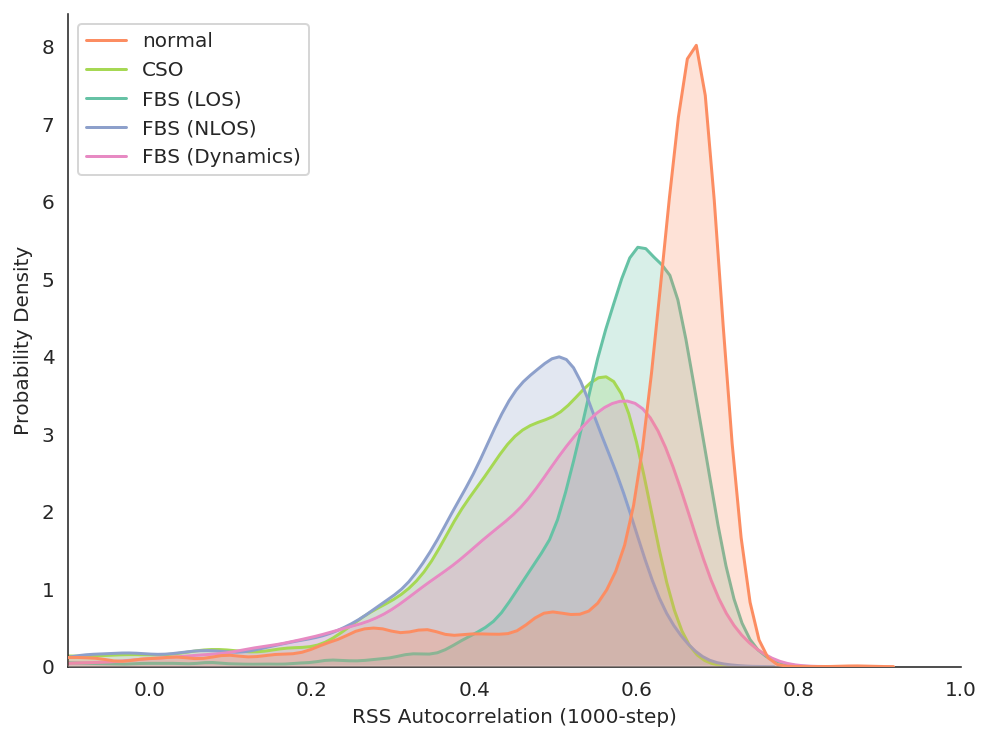

In [182]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(normal_corr, cumulative=False, shade=True, zorder=100,
                 color=colors[1], label='normal')
ax = sns.kdeplot(cso_corr, cumulative=False, shade=True,
                 color=colors[4], label='CSO')
ax = sns.kdeplot(fbs_3_corr, cumulative=False, shade=True, 
                 color=colors[0], label='FBS (LOS)')
ax = sns.kdeplot(fbs_4_corr, cumulative=False, shade=True, 
                 color=colors[2], label='FBS (NLOS)')
ax = sns.kdeplot(fbs_5_corr, shade=True, 
                 color=colors[3], label='FBS (Dynamics)')
plt.legend(loc=2)
ax.set_xlim(left=-0.1, right=1)
sns.despine()
ax.set_xlabel('RSS Autocorrelation (1000-step)')
ax.set_ylabel('Probability Density')

## RSS Value

In [10]:
normal_power = rss_power(normal_path)
fbs_3_power = rss_power(fbs_1_path)
fbs_4_power = rss_power(fbs_4_path)
fbs_5_power = rss_power(fbs_5_path)
cso_power = rss_power(cso_path)

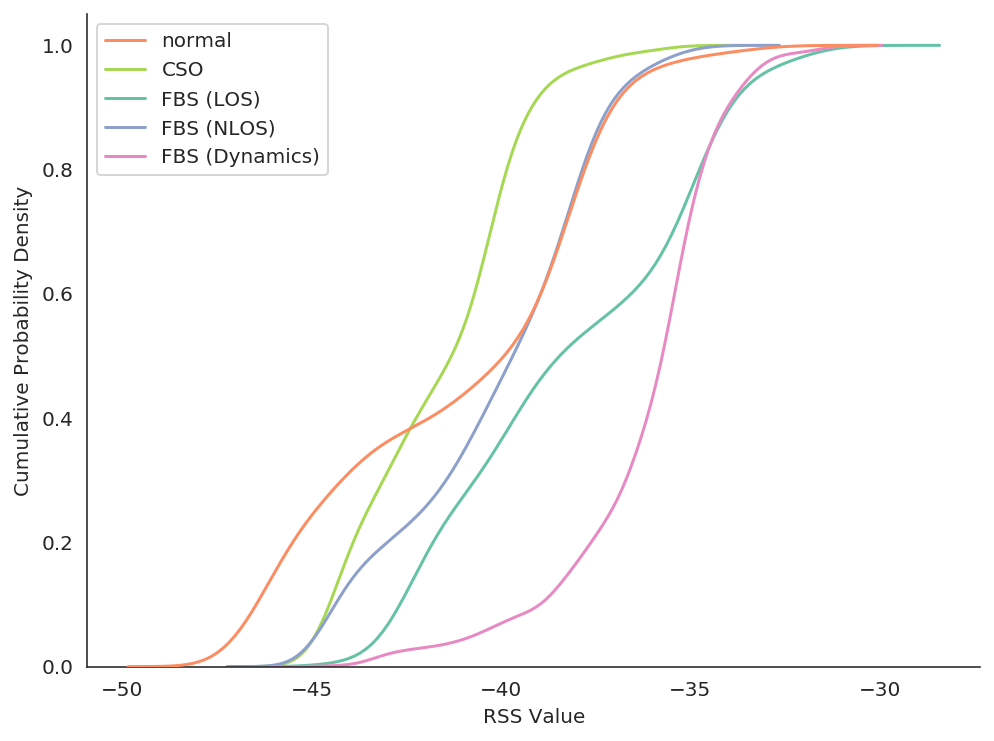

In [13]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(normal_power[:3000], cumulative=True, shade=False, zorder=100,
                 color=colors[1], label='normal')
ax = sns.kdeplot(cso_power[:3000], cumulative=True, shade=False, 
                 color=colors[4], label='CSO')
ax = sns.kdeplot(fbs_3_power[:3000], cumulative=True, shade=False, 
                 color=colors[0], label='FBS (LOS)')
ax = sns.kdeplot(fbs_4_power[:3000], cumulative=True, shade=False, 
                 color=colors[2], label='FBS (NLOS)')
ax = sns.kdeplot(fbs_5_power[:3000], cumulative=True, shade=False, 
                 color=colors[3], label='FBS (Dynamics)')

plt.legend(loc='best')
ax.set_xlabel('RSS Value')
ax.set_ylabel('Cumulative Probability Density')
sns.despine()

In [21]:
normal_power

array([-41.17857813, -36.77      , -41.32667969, ..., -46.67249219,
       -39.38152344, -46.4150625 ])

In [37]:
normal_power = rss_power(normal_path)
fbs_power = rss_power(fbs_4_path)
cso_power = rss_power(cso_path)

In [38]:
X = np.concatenate((normal_power, cso_power, fbs_power))
# X_corrs = np.concatenate((normal_corrs, jamming_corrs , fbs_corrs, cso_corrs))
y = np.concatenate((['Normal']*np.shape(normal_power)[0], ['CSO']*np.shape(cso_power)[0], ['FBS']*np.shape(fbs_power)[0]))
df_rss = pd.DataFrame(X, columns=['RSS'])
df_rss['Type'] = y

In [ ]:
df_rss

Text(-5.094999999999999, 0.5, 'RSS Raw (dB)')

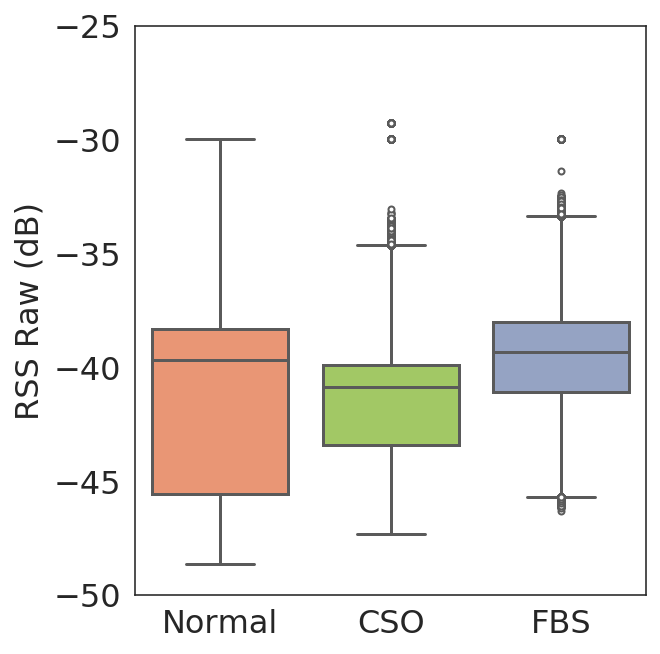

In [57]:
sns.set_style('white')
plt.rc('font', size=16)
plt.rcParams["figure.figsize"] = (5.5,5)
flierprops = dict(markerfacecolor='1.0', markersize='3',
                  linestyle='none', marker = 'o')
colorset = sns.color_palette("Set2")
colors = [colorset[i] for i in [1,4,2]]
ax = sns.catplot(x="Type", y="RSS", kind="box", palette = colors, 
                 data=df_rss, flierprops=flierprops);
ax.set(ylim=(-50, -25))
sns.despine(top=False, right=False)
plt.xlabel("")
plt.ylabel("RSS Raw (dB)")
plt.savefig('stable_rss.eps', bbox_inches = 'tight', format='eps')

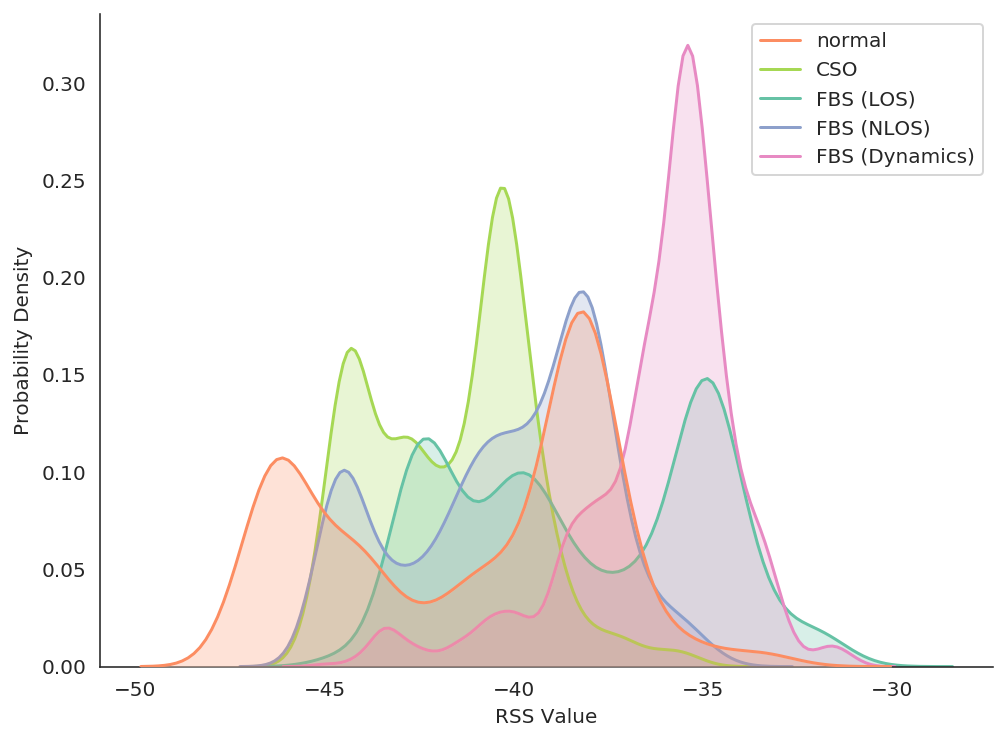

In [184]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(normal_power[:3000], shade=True, zorder=100,
                 color=colors[1], label='normal')
ax = sns.kdeplot(cso_power[:3000], shade=True, 
                 color=colors[4], label='CSO')
ax = sns.kdeplot(fbs_3_power[:3000], shade=True, 
                 color=colors[0], label='FBS (LOS)')
ax = sns.kdeplot(fbs_4_power[:3000], shade=True, 
                 color=colors[2], label='FBS (NLOS)')
ax = sns.kdeplot(fbs_5_power[:3000], shade=True, 
                 color=colors[3], label='FBS (Dynamics)')

plt.legend(loc='best')
ax.set_xlabel('RSS Value')
ax.set_ylabel('Probability Density')
sns.despine()

## RSS Value (Mean)

In [185]:
normal_mean = rss_power(normal_path)[:normal_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
fbs_3_mean = rss_power(fbs_1_path)[:fbs_3_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
fbs_4_mean = rss_power(fbs_4_path)[:fbs_4_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
fbs_5_mean = rss_power(fbs_5_path)[:fbs_5_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)
cso_mean = rss_power(cso_path)[:cso_corr.shape[0] * 1000].reshape(-1, 1000).mean(axis=1)

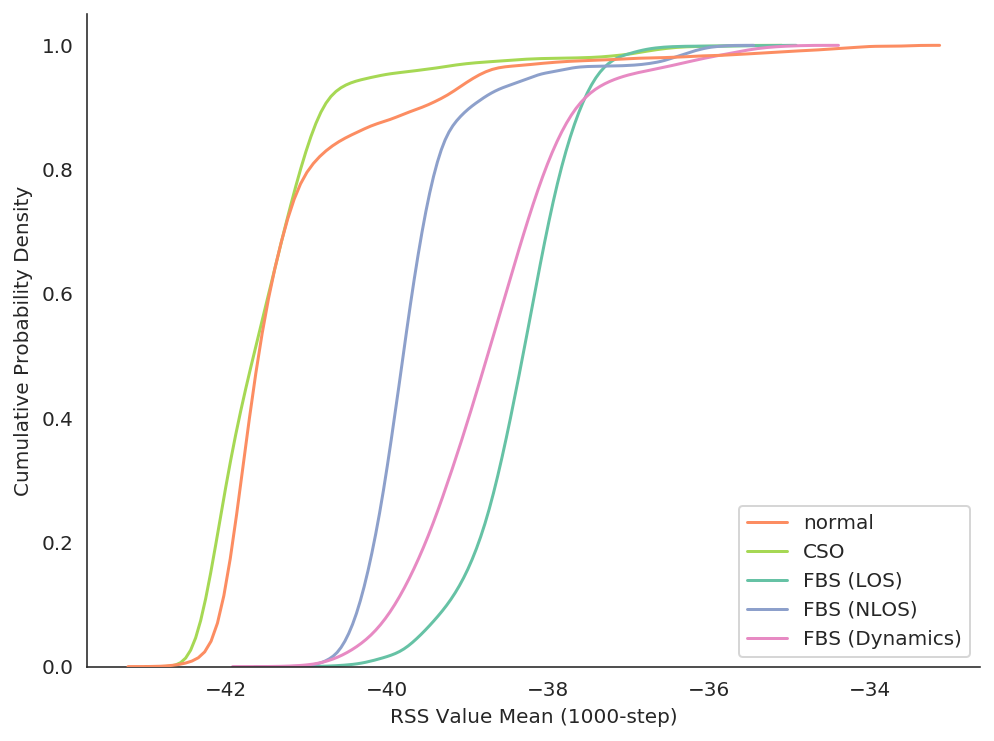

In [130]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(normal_mean, cumulative=True, shade=False, zorder=100,
                 color=colors[1], label='normal')
ax = sns.kdeplot(cso_mean, cumulative=True, shade=False, 
                 color=colors[4], label='CSO')
ax = sns.kdeplot(fbs_3_mean, cumulative=True, shade=False, 
                 color=colors[0], label='FBS (LOS)')
ax = sns.kdeplot(fbs_4_mean, cumulative=True, shade=False, 
                 color=colors[2], label='FBS (NLOS)')
ax = sns.kdeplot(fbs_5_mean, cumulative=True, shade=False, 
                 color=colors[3], label='FBS (Dynamics)')

plt.legend(loc='best')
ax.set_xlabel('RSS Value Mean (1000-step)')
ax.set_ylabel('Cumulative Probability Density')
sns.despine()

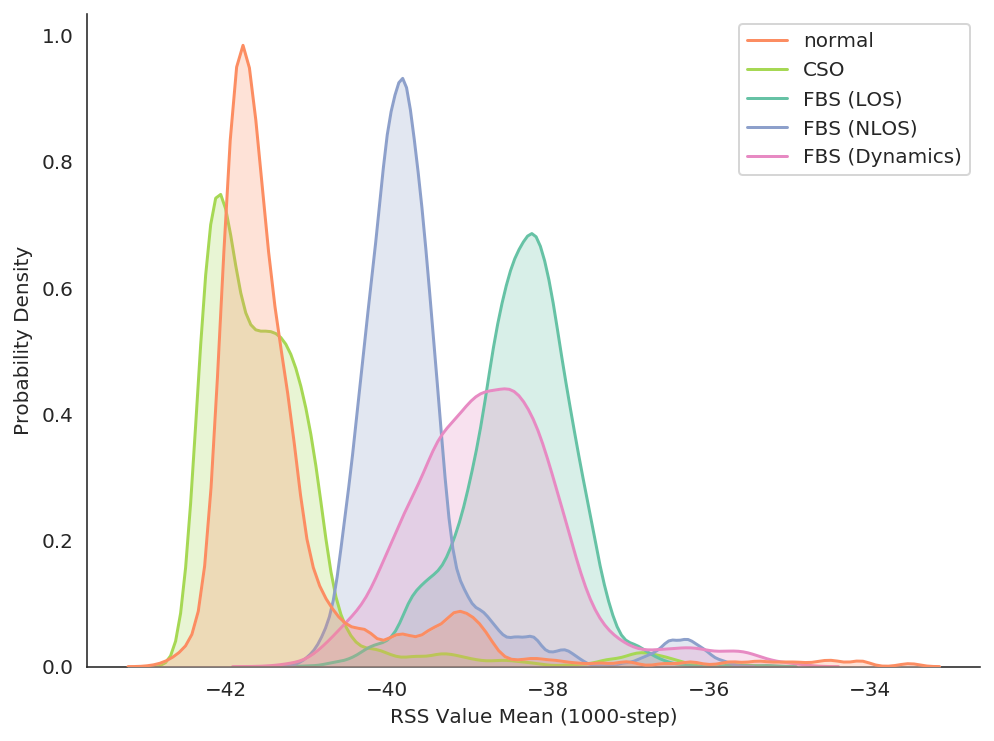

In [186]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(normal_mean, shade=True, zorder=100,
                 color=colors[1], label='normal')
ax = sns.kdeplot(cso_mean, shade=True, 
                 color=colors[4], label='CSO')
ax = sns.kdeplot(fbs_3_mean, shade=True, 
                 color=colors[0], label='FBS (LOS)')
ax = sns.kdeplot(fbs_4_mean, shade=True, 
                 color=colors[2], label='FBS (NLOS)')
ax = sns.kdeplot(fbs_5_mean,  shade=True, 
                 color=colors[3], label='FBS (Dynamics)')

plt.legend(loc='best')
ax.set_xlabel('RSS Value Mean (1000-step)')
ax.set_ylabel('Probability Density')
sns.despine()